## **Klasifikasi dengan Jaringan Syaraf Tiruan**

Dalam machine learning, klasifikasi berarti mengkategorikan kelas-kelas yang diketahui. Misalnya, mengkategorikan pelanggan yang paling menguntungkan dan tidak tertarik dari kumpulan data untuk mengiklankan produk tertentu

In [18]:
# Mengimport Library yang Digunakan
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

In [19]:
# Menggunakan dataset dari MNIST
fahsion = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fahsion.load_data()

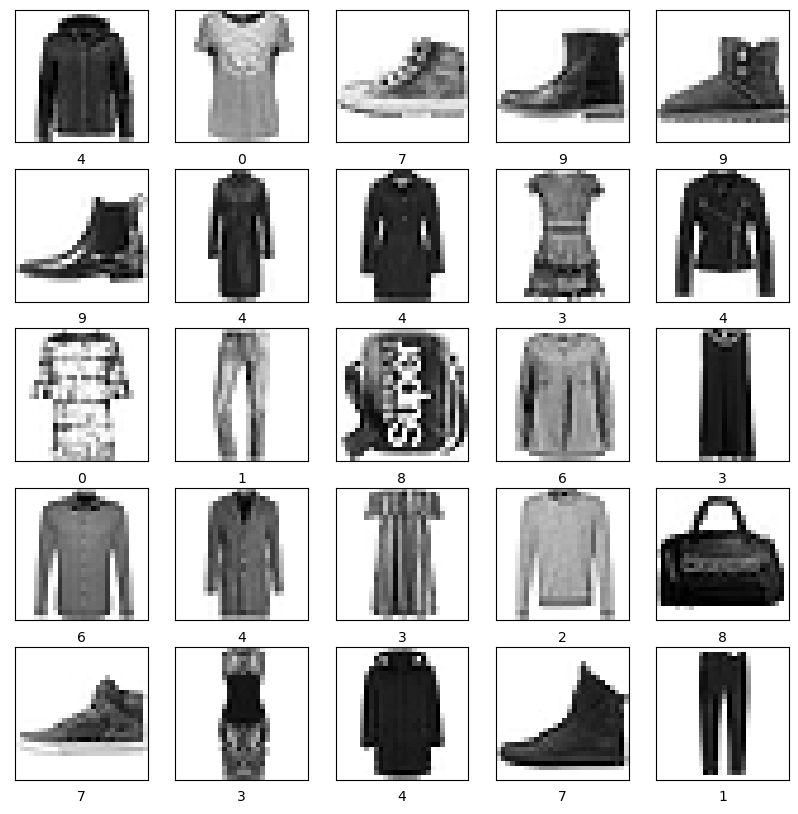

In [33]:
# Menampilkan beberapa contoh gambar dari dataset
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [21]:
# Melihat bentuk data latih dan data uji
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


## **Membangun Arsitektur Jaringan Saraf Tiruan**

Jaringan saraf adalah struktur komputasi yang digunakan untuk melatih model pembelajaran mendalam yang dapat dengan mudah mengungguli algoritma pembelajaran mesin klasik apa pun. Jaringan saraf terdiri dari tiga jenis lapisan:


1. satu lapisan input yang menerima data
2. satu atau lebih lapisan tersembunyi yang melakukan semua perhitungan untuk mempelajari fitur-fiturnya
3. satu lapisan keluaran yang menyediakan keluaran akhir

In [22]:
# Membangun Arsitektur Menggunakan 2 Lapisan Tersembunyi

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
None


In [23]:
# Membagi Data latih menjadi set latih dan validasi

x_valid, x_train = x_train[:5000]/255.0, x_train[5000:]/255.0
y_valid, y_train = y_train[:5000], y_train[5000:]

In [24]:
# Normalisasi Data

x_train = x_train / 255.0
x_valid = x_valid / 255.0
x_test = x_test / 255.0

## ****Melatih Model Klasifikasi dengan Jaringan Syaraf****

In [25]:
# Mengurangi overfitting menggunakan lapisan dropout diantara lapisan tersembunyi

from tensorflow.keras.layers import Dropout

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dropout(0.5), 
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])

In [26]:
# Melatih model untuk tugas klasifikasi 

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

early_stopping = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(x_train, y_train, epochs=30,
                    validation_data=(x_valid, y_valid),
                    callbacks=[early_stopping])

Epoch 1/30
1719/1719 [==============================] - 59s 34ms/step - loss: 1.0479 - accuracy: 0.6010 - val_loss: 0.6350 - val_accuracy: 0.7666
Epoch 2/30
1719/1719 [==============================] - 63s 37ms/step - loss: 0.6863 - accuracy: 0.7459 - val_loss: 0.5342 - val_accuracy: 0.8034
Epoch 3/30
1719/1719 [==============================] - 69s 40ms/step - loss: 0.5989 - accuracy: 0.7848 - val_loss: 0.4759 - val_accuracy: 0.8306
Epoch 4/30
1719/1719 [==============================] - 91s 53ms/step - loss: 0.5481 - accuracy: 0.8048 - val_loss: 0.4431 - val_accuracy: 0.8400
Epoch 5/30
1719/1719 [==============================] - 95s 55ms/step - loss: 0.5111 - accuracy: 0.8175 - val_loss: 0.4199 - val_accuracy: 0.8450
Epoch 6/30
1719/1719 [==============================] - 90s 52ms/step - loss: 0.4913 - accuracy: 0.8244 - val_loss: 0.3998 - val_accuracy: 0.8548
Epoch 7/30
1719/1719 [==============================] - 76s 44ms/step - loss: 0.4709 - accuracy: 0.8319 - val_loss: 0.3885 -

## ****Visualisasi hasil pelatihan****


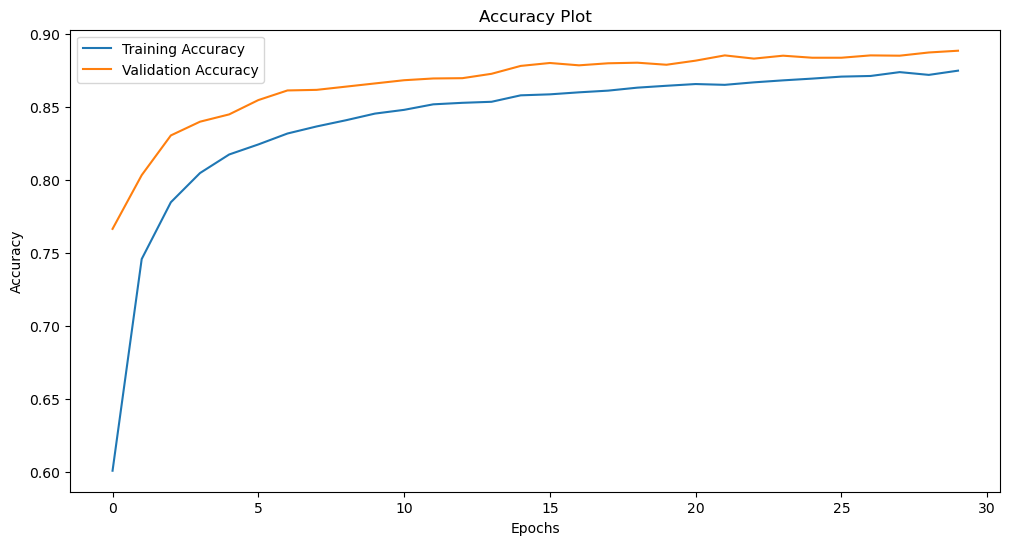

In [27]:
# Plot accuracy training dan validation
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

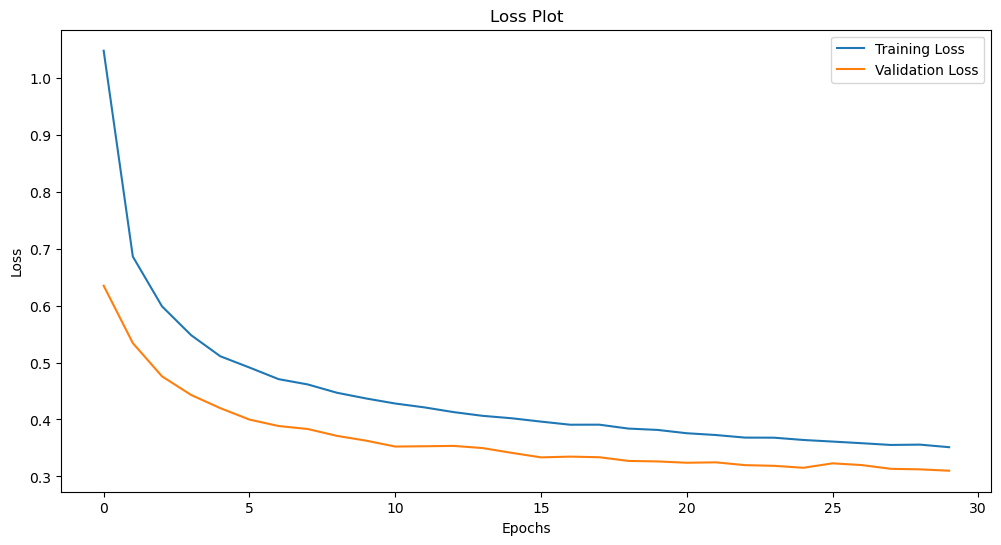

In [28]:
# Plot loss training dan validation
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [29]:
# Evaluasi Model pada Data Uji
test_loss, test_accuracy = model.evaluate(x_test[..., np.newaxis], y_test)
print(f"Akurasi pada data uji: {test_accuracy:.4f}")

313/313 [==============================] - 5s 16ms/step - loss: 89.1116 - accuracy: 0.7659
Akurasi pada data uji: 0.7659


## ****Prediksi****

In [30]:
# Melihat prediksinya
baru = x_test[:5]
prediksi = model.predict(baru)
print(prediksi)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


In [31]:
# Melihat kelas yang diprediksi
kelas = np.argmax(prediksi, axis=1)
print(kelas)

[9 2 1 1 6]
